# 6-Pipelineline

In [1]:
import os
import sys

import pandas as pd

from IPython.display import Image

# Get the current working directory of the notebook
notebook_dir = os.getcwd()
# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../'))

from pipelines import BasePipeline
from data_processing import DataProcessing
from classification_models import PerceptronModel


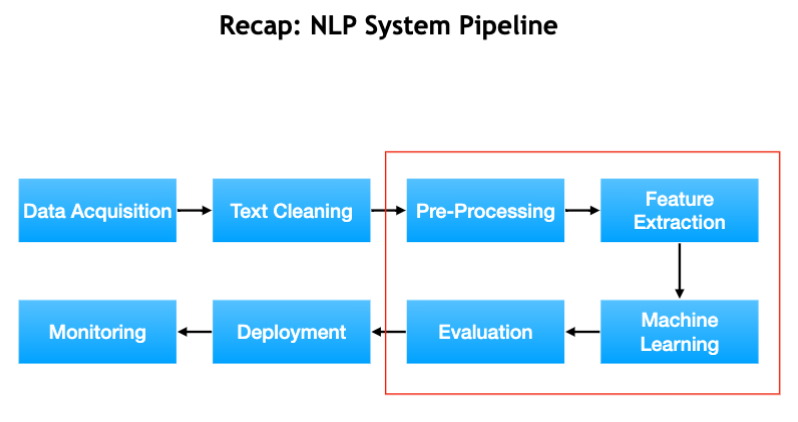

In [2]:
Image(filename='../misc/base_pipeline.png')

## Data Acquisition

### Templates to generate data

In [3]:
prediction_template = """My variables are
- $\hat{y}$, prediction
    - $\hat{y}_{s}$, source that predicted $\hat{y}$
        - Source can be person, organization, and any type of entity.
    - $\hat{y}_{t}$, time when $\hat{y}$ was made
        - Time is the exact moment that can be measured in day, hour, minutes, seconds, etc.
    - $\hat{y}_{f}$, forecast time when $\hat{y}$ is expected to come to fruition
        - Forecast can be from seconds to decades in the future.
        - How far to go out? Or where to stop?
    - $\hat{y}_a$, prediction attribute
        - Financial based attributes such as stock price, net profit, revenue
    - $\hat{y}_m$, prediction metric outcome
        - How much will the  $\hat{y}_a$ rise/increase or fall/decrease
    - $\hat{y}_v$, future verb tense
        - A verb that is associated with the future such as will, would, be going to, should, etc.

- Template: On [ $\hat{y}_{t}$,], [$\hat{y}_{s}$ person name] predicts that the [ $\hat{y}_a$] at [ $\hat{y}_s$ company name] [ $\hat{y}_v$] [ $\hat{y}_m$] by [$\hat{y}_m$, ] in [ $\hat{y}_{f}$]

Suppose you are the Chief Financial Officer at a publicly traded company on the US Stock Exchange. Please generate 10 company-based financial prediction that will occur in the future following the requirements below:

1. Should be based on real-world earnings reports
2. Only a simple sentence (prediction) (and NOT compounding using "and" or "or")
3. Should be either positive, negative, or neutral for metric outcome
4. Suppose the time when $\hat{y}$ was made is during any earning season
5. Include attributes ($\hat{y}_a$) like stock price, net profit, revenue, etc
6. Include at least 5 stocks from all industries such as technology, energy, etc
7. Should diversity the metric outcome
8. Should use any future tense word such as will, may, should, could, etc and phrases such as high chance/probability/degree of...
9. Should have a forecast time when $\hat{y}$ is expected to come to fruition ($\hat{y}_{f}$) between 2025 to 2030
10. Diversity the name ($\hat{y}_{s}$)
11. Should use synonyms of predicts such as forecasts, speculates, forsee, envision, etc
12. Only include the predictions without "Here are 10 company-based financial prediction..." or anything similar and without the numbers in front
13. Do not generate redundant non-predictions

- Examples:
    1. On [Monday, December 16, 2024], [Detravious] forecasts that the [revenue] at [Apple] [will] [rise] by [8% to $120 per share] in [Q1 of 2025].
    2. On [Tuesday, November 19, 2024], [Ava Lee] predicts that the [operating cash flow] at [ExxonMobil (XOM)] [should] [decrease] by [5% to $20 billion] in [Q2 of 2027].
    3. On [Wednesday, October 23, 2024], [Julian Hall] envisions that the [stock price] at [NVIDIA (NVDA)] [will likely] [rise] by [25% to $1,000 per share] in [Q3 of 2028].
    4. On [Thursday, September 19, 2024], [Mia Patel] speculates that the [dividend payout ratio] at [Coca-Cola (KO)] [will probably] [remain] at [75%] in [Q1 of 2026].
    5. On [Friday, August 16, 2024], [Logan White] predicts that the [research and development expenses] at [Pfizer (PFE)] [may] [increase] by [8% to $10 billion] in [FY 2029].
    6. On [Monday, July 22, 2024], [Hannah Brooks] forecasts that the [return on equity (ROE)] at [JPMorgan Chase (JPM)] [has a high probability of] [improving] by [2% to 15%] in [Q4 of 2027].
    7. On [Tuesday, June 18, 2024], [Detravious Martin] predicts that the [capital expenditures] at [UnitedHealth Group (UNH)] [should] [decrease] by [3% to $2 billion] in [Q2 of 2028].
    8. On [Wednesday, May 15, 2024], [Raj Taylor] envisions that the [gross profit margin] at [McDonald's (MCD)] [will likely] [expand] by [1% to 18%] in [Q3 of 2026].
    9. On [Thursday, April 18, 2024], [Jackson Lee] forsees that the [total debt] at [Intel (INTC)] [will probably] [decrease] by [10% to $20 billion] in [Q1 of 2029].
    10. On [Friday, March 15, 2024], [Ethan Patel] predicts that the [earnings before interest and taxes (EBIT)] at [Verizon Communications (VZ)] [may] [increase] by [5% to $20 billion] in [FY 2028].
"""

prediction_label = 1

non_prediction_template = """Generate any sentence that's not a prediction, which we name non-prediction. A prediction is below with variables
    - $\hat{y}$, prediction
        - $\hat{y}_{s}$, source that predicted $\hat{y}$
            - Source can be person, organization, and any type of entity.
        - $\hat{y}_{t}$, time when $\hat{y}$ was made
            - Time is the exact moment that can be measured in day, hour, minutes, seconds, etc.
        - $\hat{y}_{f}$, forecast time when $\hat{y}$ is expected to come to fruition
            - Forecast can be from seconds to decades in the future.
            - How far to go out? Or where to stop?
        - $\hat{y}_a$, prediction attribute
            - Financial based attributes such as stock price, net profit, revenue
        - $\hat{y}_m$, prediction metric outcome
            - How much will the  $\hat{y}_a$ rise/increase or fall/decrease
        - $\hat{y}_v$, future verb tense
            - A verb that is associated with the future such as will, would, be going to, should, etc.

    Please generate 10 non-predictions with the following requirements below:

    1. Only a simple non-prediction (sentence)) (and NOT compounding using "and" or "or")
    2. Include no additional information such as "Here are nine simple sentences that are not predictions:", number before non-prediction
    3. At least 10 words and no more than 20 words in the non-prediction
    4. Do not generate redundant non-predictions
"""

non_prediction_label = 0

### Generate predictions and non-predictions data

In [4]:
base_pipeline = BasePipeline()

In [5]:
pd.set_option('max_colwidth', 800)

predictions_df = base_pipeline.generate_predictions(text=prediction_template, label=prediction_label)
non_predictions_df = base_pipeline.generate_predictions(text=non_prediction_template, label=non_prediction_label)

## Text Cleaning

- Purpose: To remove unncessary things (such as extra space, lemmentization, etc) the model generated. 
- This is optional.

In [6]:
dfs = [predictions_df, non_predictions_df]
base_df = DataProcessing.concat_dfs(dfs)
base_df

,Base Predictions,Prediction Label
0,"On Monday, December 16, 2024, Emily Chen forecasts that the revenue at Amazon (AMZN) will rise by 12% to $150 billion in Q2 of 2026.",1
1,"On Tuesday, November 19, 2024, Liam Reed predicts that the operating cash flow at Chevron (CVX) should decrease by 4% to $15 billion in Q1 of 2027.",1
2,"On Wednesday, October 23, 2024, Sophia Patel envisions that the stock price at Microsoft (MSFT) will likely rise by 20% to $400 per share in Q4 of 2028.",1
3,"On Thursday, September 19, 2024, Ethan Kim speculates that the dividend payout ratio at Procter & Gamble (PG) will probably remain at 70% in Q3 of 2026.",1
4,"On Friday, August 16, 2024, Ava Morales predicts that the research and development expenses at Johnson & Johnson (JNJ) may increase by 10% to $12 billion in FY 2029.",1
5,"On Monday, July 22, 2024, Julian Sanchez forecasts that the return on equity (ROE) at Visa (V) has a high probability of improving by 3% to 20% in Q2 of 2027.",1
6,"On Tuesday, June 18, 2024, Mia Garcia predicts that the capital expenditures at AT&T (T) should decrease by 5% to $3 billion in Q1 of 2028.",1
7,"On Wednesday, May 15, 2024, Logan Brooks envisions that the gross profit margin at Cisco Systems (CSCO) will likely expand by 2% to 22% in Q4 of 2026.",1
8,"On Thursday, April 18, 2024, Hannah Taylor forsees that the total debt at 3M (MMM) will probably decrease by 8% to $10 billion in Q3 of 2029.",1
9,"On Friday, March 15, 2024, Detravious White predicts that the earnings before interest and taxes (EBIT) at Boeing (BA) may increase by 6% to $10 billion in FY 2028.",1


In [7]:
clean_data = False

if clean_data:
    base_df = base_pipeline.clean_predictions(base_df)

base_df

,Base Predictions,Prediction Label
0,"On Monday, December 16, 2024, Emily Chen forecasts that the revenue at Amazon (AMZN) will rise by 12% to $150 billion in Q2 of 2026.",1
1,"On Tuesday, November 19, 2024, Liam Reed predicts that the operating cash flow at Chevron (CVX) should decrease by 4% to $15 billion in Q1 of 2027.",1
2,"On Wednesday, October 23, 2024, Sophia Patel envisions that the stock price at Microsoft (MSFT) will likely rise by 20% to $400 per share in Q4 of 2028.",1
3,"On Thursday, September 19, 2024, Ethan Kim speculates that the dividend payout ratio at Procter & Gamble (PG) will probably remain at 70% in Q3 of 2026.",1
4,"On Friday, August 16, 2024, Ava Morales predicts that the research and development expenses at Johnson & Johnson (JNJ) may increase by 10% to $12 billion in FY 2029.",1
5,"On Monday, July 22, 2024, Julian Sanchez forecasts that the return on equity (ROE) at Visa (V) has a high probability of improving by 3% to 20% in Q2 of 2027.",1
6,"On Tuesday, June 18, 2024, Mia Garcia predicts that the capital expenditures at AT&T (T) should decrease by 5% to $3 billion in Q1 of 2028.",1
7,"On Wednesday, May 15, 2024, Logan Brooks envisions that the gross profit margin at Cisco Systems (CSCO) will likely expand by 2% to 22% in Q4 of 2026.",1
8,"On Thursday, April 18, 2024, Hannah Taylor forsees that the total debt at 3M (MMM) will probably decrease by 8% to $10 billion in Q3 of 2029.",1
9,"On Friday, March 15, 2024, Detravious White predicts that the earnings before interest and taxes (EBIT) at Boeing (BA) may increase by 6% to $10 billion in FY 2028.",1


## Data Procesing

In [8]:
pre_processed_df = DataProcessing.shuffle_df(base_df)
pre_processed_df

,Base Predictions,Prediction Label
0,The manager is meeting with the team to discuss ongoing projects today.,0
1,"On Tuesday, June 18, 2024, Mia Garcia predicts that the capital expenditures at AT&T (T) should decrease by 5% to $3 billion in Q1 of 2028.",1
2,The book I'm reading is very interesting and engaging to me.,0
3,"On Wednesday, October 23, 2024, Sophia Patel envisions that the stock price at Microsoft (MSFT) will likely rise by 20% to $400 per share in Q4 of 2028.",1
4,The students are working on their assignments quietly in class now.,0
5,The company is currently hiring new employees for various positions available now.,0
6,"On Monday, December 16, 2024, Emily Chen forecasts that the revenue at Amazon (AMZN) will rise by 12% to $150 billion in Q2 of 2026.",1
7,The music playing is loud and energetic in this coffee shop.,0
8,"On Friday, August 16, 2024, Ava Morales predicts that the research and development expenses at Johnson & Johnson (JNJ) may increase by 10% to $12 billion in FY 2029.",1
9,The city has a lot of historical landmarks and old buildings everywhere.,0


## Feature Extraction

- NOTE: Setting the `max_features` parameter with the `TfidfVectorizer` class so I create custom sentences without having to create too many. See more on custom sentences below.

In [9]:
# tfidf_vectorized_features = base_pipeline.tfidf_features(df, feature_scores=False)
tfidf_vectorized_features, tfidf_vectorized_scores_df = base_pipeline.tfidf_features(pre_processed_df, feature_scores=True)
tfidf_vectorized_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 267 stored elements and shape (20, 100)>

In [10]:
tfidf_vectorized_scores_df

,10,12,15,16,18,19,20,2024,2026,2027,...,students,that,the,this,thursday,to,today,tuesday,wednesday,will
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.369497,0.000000,0.000000,0.259658,0.544253,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.268391,0.00000,0.000000,0.150018,0.000000,0.000000,...,0.000000,0.150018,0.091106,0.000000,0.000000,0.128047,0.000000,0.268391,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.174840,0.000000,0.000000,0.245732,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.319068,0.178344,0.000000,0.000000,...,0.000000,0.178344,0.108309,0.000000,0.000000,0.152224,0.000000,0.000000,0.319068,0.243994
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.505467,0.000000,0.171582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.167708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.278222,0.000000,0.278222,0.000000,0.00000,0.000000,0.155513,0.251052,0.000000,...,0.000000,0.155513,0.094443,0.000000,0.000000,0.132737,0.000000,0.000000,0.000000,0.212759
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.190262,0.463304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.206450,0.228793,0.000000,0.228793,0.000000,0.00000,0.000000,0.127885,0.000000,0.000000,...,0.000000,0.127885,0.077665,0.000000,0.000000,0.109155,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.127514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Models

1. Perceptron

In [11]:
prediction_labels = pre_processed_df['Prediction Label']
X_train, X_test, y_train, y_test = DataProcessing.split_data(tfidf_vectorized_features, prediction_labels)

In [12]:
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 67 stored elements and shape (4, 100)>

In [13]:
perception_model = PerceptronModel()

perception_model.train_model(X_train, y_train)
y_predictions = perception_model.predict(X_test)
y_predictions

0    0
1    1
2    1
3    1
dtype: int64

In [14]:
DataProcessing.join_predictions_with_labels(pre_processed_df, y_test, y_predictions, perception_model)

,Base Predictions,Prediction Label,Perceptron Model Prediction
16,"On Thursday, April 18, 2024, Hannah Taylor forsees that the total debt at 3M (MMM) will probably decrease by 8% to $10 billion in Q3 of 2029.",1,0
17,"On Monday, July 22, 2024, Julian Sanchez forecasts that the return on equity (ROE) at Visa (V) has a high probability of improving by 3% to 20% in Q2 of 2027.",1,1
18,"On Thursday, September 19, 2024, Ethan Kim speculates that the dividend payout ratio at Procter & Gamble (PG) will probably remain at 70% in Q3 of 2026.",1,1
19,"On Tuesday, November 19, 2024, Liam Reed predicts that the operating cash flow at Chevron (CVX) should decrease by 4% to $15 billion in Q1 of 2027.",1,1


## Evaluation

1. Mean Squared Error (MSE) (in-prgress)

In [15]:
metrics = base_pipeline.evaluation_metrics(y_test, y_predictions, default_metrics=True)
metrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## Further exploration

1. Create a custom sentence
2. Vectorize custom sentence
3. Pass to model to get prediction

In [16]:
# Create a dataframe with the given sentence
# custom_sentences = [
#     "Hey, how are you?", 
#     "Joe Hall thinks that the earnings before interest and taxes (EBIT) at 3M (MMM) will decrease by 90% to $10 million in FY 2028, which Raj stated on Monday, December 16, 2024", 
#     "Malique Mell, on Monday, December 16, 2024, predicted that the earnings before interest and taxes (EBIT) at 3M (MMM) will drop by 90%, reaching $10 million in FY 2028.", "Raj Jensen predict that the earnings before interest and taxes (EBIT) at 3M (MMM) will decrease by 90% to $10 million in FY 2028."
#     "Emily Chen forecasts that the net profit at Tesla (TSLA) will decrease by 15% to $5 billion in FY 2027.",
#     "On Tuesday, March 18, 2025, Raj Patel speculates that the stock price of ExxonMobil (XOM) could rise by 8% to $120 by Q4 of 2026.",
#     "There is a high probability that the revenue at Microsoft (MSFT) will reach $200 billion in FY 2029."
#     ]

custom_sentences = [
    "Emily Chen forecasts that the net profit at Tesla (TSLA) will decrease by 15% to $5 billion in FY 2027.",
    "Raj Patel speculates that the stock price of ExxonMobil (XOM) could rise by 8% to $120 by Q4 of 2026.",
    "There is a high probability that the revenue at Microsoft (MSFT) will reach $200 billion in FY 2029.",
    "On Thursday, April 10, 2025, Sarah Lee envisions that the operating income at Apple (AAPL) will increase by 10% to $80 billion in FY 2026.",
    "Michael Brown predicts that the dividend yield at Chevron (CVX) will rise to 5% by Q3 of 2027.",
    "It is anticipated that the market share of Alphabet (GOOGL) will grow by 3% in FY 2028.",
    "Hey, how are you?",
    "Joe Hall thinks that the earnings before interest and taxes (EBIT) at 3M (MMM) will decrease by 90% to $10 million in FY 2028, which Raj stated on Monday, December 16, 2024.",
    "Malique Mell, on Monday, December 16, 2024, predicted that the earnings before interest and taxes (EBIT) at 3M (MMM) will drop by 90%, reaching $10 million in FY 2028.",
    "Raj Jensen predicts that the earnings before interest and taxes (EBIT) at 3M (MMM) will decrease by 90% to $10 million in FY 2028.",
    "The weather today is sunny with a chance of rain in the evening.",
    "I enjoy reading books and watching movies during my free time."
]

data = {"Base Predictions": custom_sentences}
custom_sentences_df = pd.DataFrame(data)
custom_sentences_df


,Base Predictions
0,Emily Chen forecasts that the net profit at Tesla (TSLA) will decrease by 15% to $5 billion in FY 2027.
1,Raj Patel speculates that the stock price of ExxonMobil (XOM) could rise by 8% to $120 by Q4 of 2026.
2,There is a high probability that the revenue at Microsoft (MSFT) will reach $200 billion in FY 2029.
3,"On Thursday, April 10, 2025, Sarah Lee envisions that the operating income at Apple (AAPL) will increase by 10% to $80 billion in FY 2026."
4,Michael Brown predicts that the dividend yield at Chevron (CVX) will rise to 5% by Q3 of 2027.
5,It is anticipated that the market share of Alphabet (GOOGL) will grow by 3% in FY 2028.
6,"Hey, how are you?"
7,"Joe Hall thinks that the earnings before interest and taxes (EBIT) at 3M (MMM) will decrease by 90% to $10 million in FY 2028, which Raj stated on Monday, December 16, 2024."
8,"Malique Mell, on Monday, December 16, 2024, predicted that the earnings before interest and taxes (EBIT) at 3M (MMM) will drop by 90%, reaching $10 million in FY 2028."
9,Raj Jensen predicts that the earnings before interest and taxes (EBIT) at 3M (MMM) will decrease by 90% to $10 million in FY 2028.


In [17]:
custom_sentences_features, custom_sentences_scores = base_pipeline.tfidf_features(custom_sentences_df, feature_scores=True)
custom_sentences_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 203 stored elements and shape (12, 100)>

In [18]:
custom_sentences_scores

,10,120,15,16,200,2024,2025,2026,2027,2028,...,rise,sarah,share,speculates,stated,taxes,that,the,to,will
0,0.000000,0.000000,0.319758,0.000000,0.000000,0.000000,0.000000,0.000000,0.274611,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140556,0.129944,0.180270,0.152288
1,0.000000,0.282969,0.000000,0.000000,0.000000,0.000000,0.000000,0.243017,0.000000,0.000000,...,0.243017,0.000000,0.000000,0.282969,0.000000,0.000000,0.124385,0.114994,0.159530,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.324473,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142629,0.131861,0.000000,0.154534
3,0.333905,0.000000,0.000000,0.000000,0.000000,0.000000,0.245181,0.210564,0.000000,0.000000,...,0.000000,0.245181,0.000000,0.000000,0.000000,0.000000,0.107775,0.099638,0.138226,0.116770
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270584,0.000000,...,0.270584,0.000000,0.000000,0.000000,0.000000,0.000000,0.138495,0.128038,0.177626,0.150054
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217414,...,0.000000,0.000000,0.319287,0.000000,0.000000,0.000000,0.140350,0.129753,0.000000,0.152064
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.169497,0.000000,0.000000,0.213773,0.000000,0.213773,0.000000,0.000000,0.000000,0.169497,...,0.000000,0.000000,0.000000,0.000000,0.248918,0.188838,0.109417,0.101156,0.140333,0.118550
8,0.166775,0.000000,0.000000,0.210341,0.000000,0.210341,0.000000,0.000000,0.000000,0.166775,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.185806,0.107660,0.099532,0.000000,0.116646
9,0.202108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.202108,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.225171,0.130469,0.120619,0.167333,0.141359


In [19]:
custom_sentences_predictions = perception_model.predict(custom_sentences_features)
custom_sentences_predictions

0     1
1     0
2     0
3     1
4     0
5     1
6     0
7     0
8     1
9     0
10    1
11    0
dtype: int64

In [21]:
DataProcessing.join_predictions_with_sentences(custom_sentences_df, custom_sentences_predictions, perception_model)

,Base Predictions,Perceptron Model Prediction
0,Emily Chen forecasts that the net profit at Tesla (TSLA) will decrease by 15% to $5 billion in FY 2027.,1
1,Raj Patel speculates that the stock price of ExxonMobil (XOM) could rise by 8% to $120 by Q4 of 2026.,0
2,There is a high probability that the revenue at Microsoft (MSFT) will reach $200 billion in FY 2029.,0
3,"On Thursday, April 10, 2025, Sarah Lee envisions that the operating income at Apple (AAPL) will increase by 10% to $80 billion in FY 2026.",1
4,Michael Brown predicts that the dividend yield at Chevron (CVX) will rise to 5% by Q3 of 2027.,0
5,It is anticipated that the market share of Alphabet (GOOGL) will grow by 3% in FY 2028.,1
6,"Hey, how are you?",0
7,"Joe Hall thinks that the earnings before interest and taxes (EBIT) at 3M (MMM) will decrease by 90% to $10 million in FY 2028, which Raj stated on Monday, December 16, 2024.",0
8,"Malique Mell, on Monday, December 16, 2024, predicted that the earnings before interest and taxes (EBIT) at 3M (MMM) will drop by 90%, reaching $10 million in FY 2028.",1
9,Raj Jensen predicts that the earnings before interest and taxes (EBIT) at 3M (MMM) will decrease by 90% to $10 million in FY 2028.,0
